In [ ]:
# RESUME CLASSIFICATION using MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv
User uploaded file "UpdatedResumeDataSet.csv" with length 509755 bytes


In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [7]:
print(df['Category'].value_counts())

Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


<Axes: xlabel='Category', ylabel='count'>

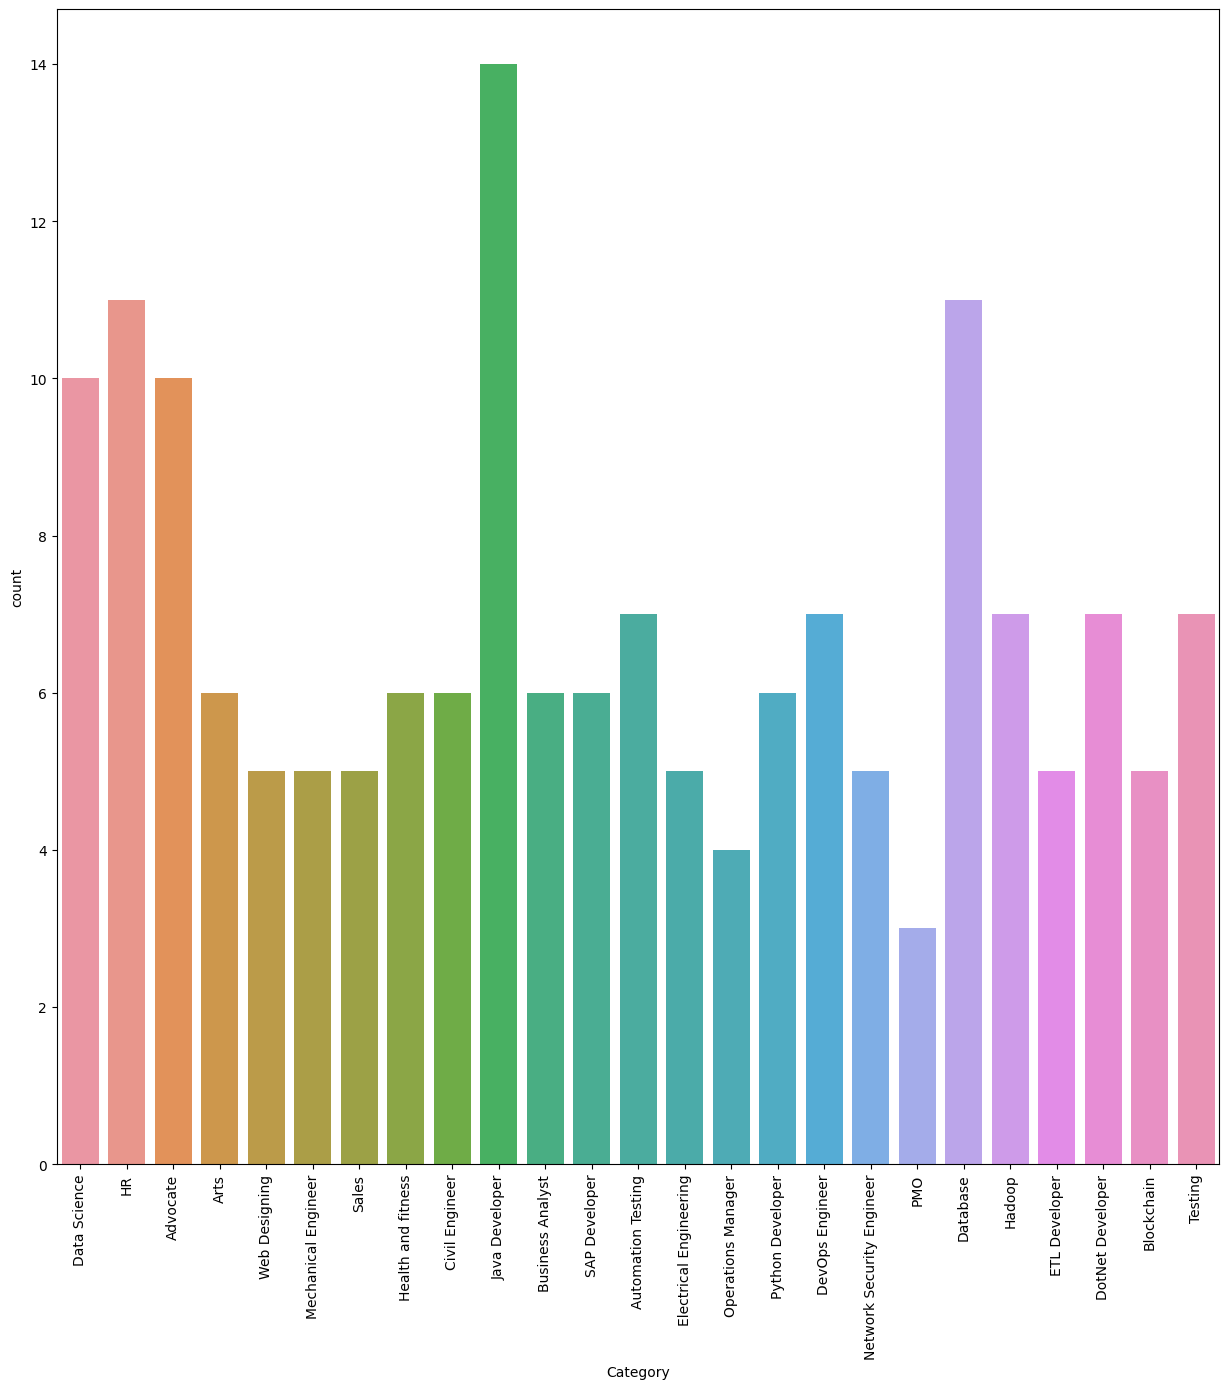

In [8]:
plt.figure(figsize= (15, 15))
plt.xticks(rotation= 90)
sns.countplot(data= df,x= 'Category')

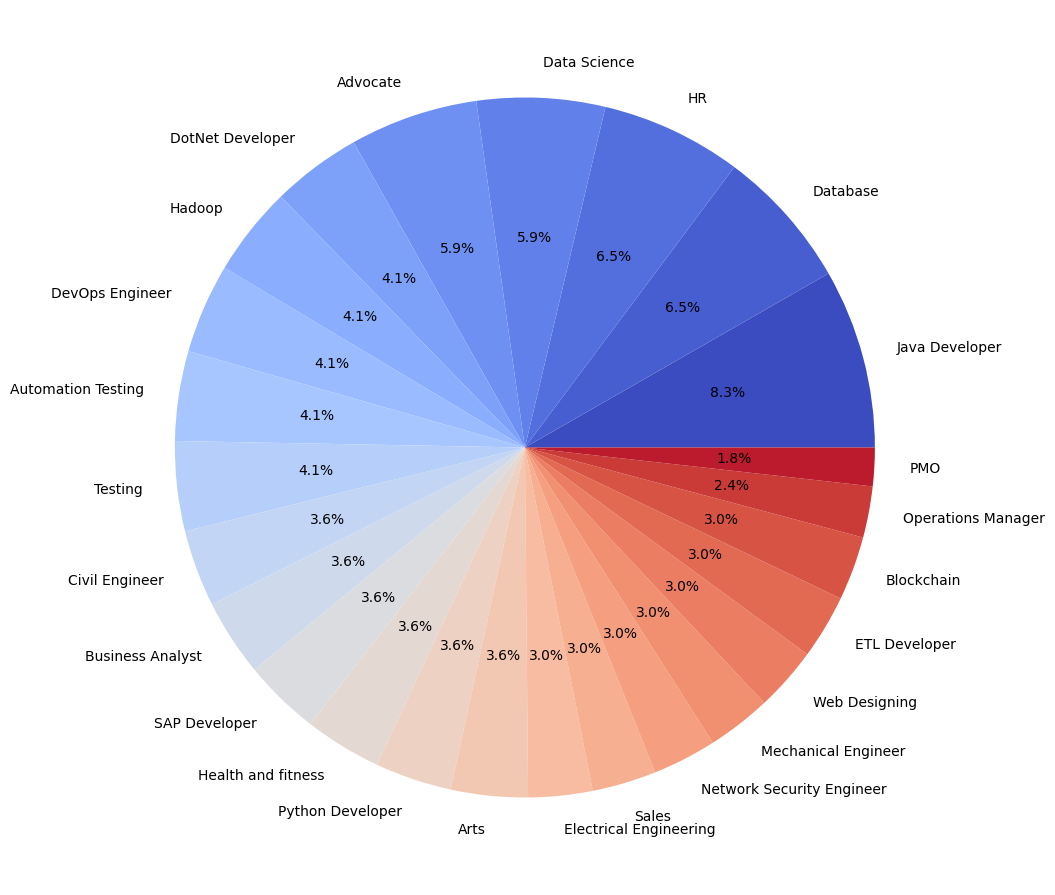

In [9]:
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index
plt.figure(1, figsize =(25, 25))
theGrid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,2)]
plt.subplot(theGrid[0, 1], aspect = 1)

sourcePie = plt.pie(targetCounts, labels= targetLabels, colors = colors, autopct= '%1.1f%%')
plt.show()

In [10]:
df['Resume'] = df['Resume'].str.lower()
print(df['Resume'])

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
164    computer skills: â¢ proficient in ms office (...
165    â willingness to accept the challenges. â ...
166    personal skills â¢ quick learner, â¢ eagerne...
167    computer skills & software knowledge ms-power ...
168    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 169, dtype: object


In [11]:
import re

In [12]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # removing https
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', ' ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

In [13]:
import re

resumeText = "Héllø, thïs résumé cöntains non-ASCII characters."
modifiedText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
print(modifiedText)

H ll , th s r sum  c ntains non-ASCII characters.


In [14]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [15]:
print(df['cleaned_resume'][30])

 hard working quick learnereducation details june 2014 to may 2017 llb law mumbai maharashtra mumbai university january 2014 b com commerce mumbai maharashtra mumbai university january 2011 hsc maharashtra board january 2009 ssc maharashtra boardadvocateskill details company details company the vidishtra description 


In [16]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


In [17]:
sentLens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sentLens.append(length)
    
print(len(sentLens))
print(max(sentLens))

169
2059


In [18]:
df['Resume'][100]

'education details \r\njuly 2016 to may 2019 be electrical and electronics engineering bhopal, madhya pradesh rgpv\r\njuly 2012 to may 2015 diploma in electrical electrical engineering bhopal, madhya pradesh rgpv university bhopal\r\n matric   ghs bhulielectrical engineeringskill details \r\nbasic computer, electrical machine, electrical wiring, solar power plant, distribution substation- exprience - less than 1 year monthscompany details \r\ncompany - enigma business advisor\r\ndescription - solar energy \r\n1. solar power plant installation\r\n2. maintenance \r\n\r\ntransmission and distribution line \r\n1.  installation'

In [19]:
df['cleaned_resume'][100]

'education details july 2016 to may 2019 be electrical and electronics engineering bhopal madhya pradesh rgpv july 2012 to may 2015 diploma in electrical electrical engineering bhopal madhya pradesh rgpv university bhopal matric ghs bhulielectrical engineeringskill details basic computer electrical machine electrical wiring solar power plant distribution substation exprience less than 1 year monthscompany details company enigma business advisor description solar energy 1 solar power plant installation 2 maintenance transmission and distribution line 1 installation'

In [20]:
setOFStopWords = set(stopwords.words('english'))

In [21]:
setOFStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
totalWords = []
sentences = df['cleaned_resume'].values
cleanedSent = ''

for i in range(1, 160):
    cleanedText = cleanResume(sentences[i])
    cleanedSent += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in setOFStopWords and word not in string.punctuation:
            totalWords.append(word)
            
wordFreqDist = nltk.FreqDist(totalWords)
mostCommon = wordFreqDist.most_common(50)
print(mostCommon)

[('exprience', 598), ('company', 570), ('project', 532), ('description', 520), ('months', 507), ('details', 505), ('data', 364), ('1', 345), ('management', 303), ('team', 267), ('database', 264), ('sql', 231), ('year', 229), ('system', 216), ('maharashtra', 215), ('6', 209), ('using', 205), ('less', 204), ('business', 195), ('server', 182), ('development', 181), ('testing', 176), ('january', 174), ('ltd', 174), ('test', 174), ('client', 164), ('skills', 155), ('application', 152), ('c', 148), ('engineering', 147), ('work', 147), ('pune', 147), ('java', 146), ('responsibilities', 144), ('pvt', 143), ('education', 138), ('technical', 136), ('environment', 136), ('software', 129), ('india', 126), ('working', 125), ('reports', 125), ('services', 124), ('like', 123), ('developer', 122), ('monthscompany', 120), ('various', 120), ('requirements', 119), ('design', 114), ('sales', 111)]


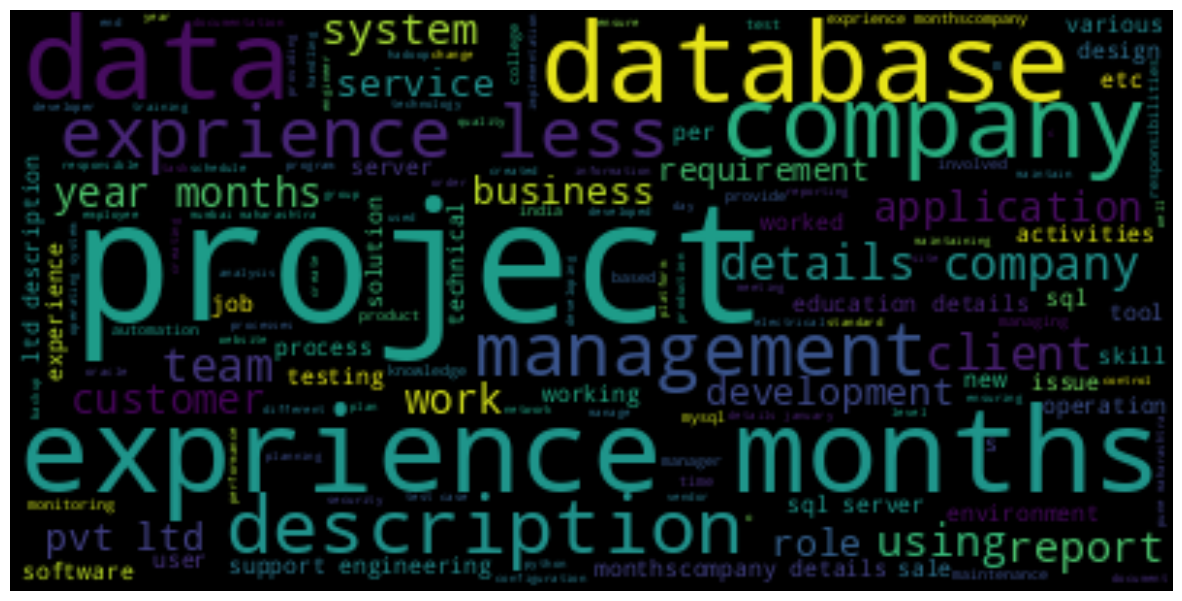

In [23]:
wc = WordCloud().generate(cleanedSent)
plt.figure(figsize= (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
lenc = LabelEncoder()
df['Category_Labelled'] = lenc.fit_transform(df['Category'])

In [25]:
df.head()

,Category,Resume,cleaned_resume,Category_Labelled
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6


In [26]:
Text = df['cleaned_resume'].values
op_labels = df['Category_Labelled'].values

In [27]:
wordVectorizer = TfidfVectorizer(max_features= 1500)
wordVectorizer.fit(Text)
features = wordVectorizer.transform(Text)

In [29]:
wordVectorizer.get_feature_names()

AttributeError: ignored

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(features, op_labels, test_size= 0.25)

In [31]:
mnb = MultinomialNB()

In [32]:
mnb.fit(xTrain, yTrain)

MultinomialNB()

In [33]:
mnb.score(xTrain, yTrain)

0.47619047619047616

In [34]:
predicted = mnb.predict(xTest)

In [35]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.40      1.00      0.57         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         2
          15       0.03      1.00      0.06         1
          17       0.00      0.00      0.00         2
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

LogisticRegression()

In [37]:
lr.score(xTrain, yTrain)

0.8571428571428571

In [40]:
predicted = lr.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.20      1.00      0.33         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.50      1.00      0.67         3
          13       1.00      1.00      1.00         1
          14       1.00      0.50      0.67         2
          15       0.06      1.00      0.12         1
          17       0.00      0.00      0.00         2
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [41]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [42]:
dt.score(xTrain, yTrain)

1.0

In [43]:
predicted = dt.predict(xTest)

In [44]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         2
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         2
          11       1.00      0.50      0.67         2
          12       0.27      1.00      0.43         3
          13       1.00      1.00      1.00         1
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          17       1.00      0.50      0.67         2
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [46]:
rf.score(xTrain, yTrain)

1.0

In [47]:
predicted = rf.predict(xTest)

In [48]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.67      1.00      0.80         2
           8       1.00      0.33      0.50         3
           9       0.40      0.67      0.50         3
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       0.43      1.00      0.60         3
          13       1.00      1.00      1.00         1
          14       1.00      0.50      0.67         2
          15       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         0
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [49]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC()
lsvm.fit(xTrain, yTrain)

LinearSVC()

In [50]:
lsvm.score(xTrain, yTrain)

1.0

In [51]:
predicted = lsvm.predict(xTest)

In [52]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [53]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)

SGDClassifier()

In [54]:
sgd.score(xTrain, yTrain)

1.0

In [55]:
predicted = sgd.predict(xTest)

In [56]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [58]:
knn.score(xTrain, yTrain)

0.7936507936507936

In [59]:
predicted = knn.predict(xTest)

In [60]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.25      0.50      0.33         2
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       0.29      1.00      0.44         2
           5       0.50      1.00      0.67         1
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [61]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [('lr', lr),
                                       ('dt', dt),
                                       ('knn', knn),
                                       ('sgd', sgd),
                                       ('mnb', mnb),
                                       ('rf', rf),
                                       ('lsvm', lsvm)],
                         voting = 'hard')
voting.fit(xTrain, yTrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier()), ('mnb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('lsvm', LinearSVC())])

In [62]:
voting.score(xTrain, yTrain)

1.0

In [63]:
predicted = voting.predict(xTest)

In [64]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.25      1.00      0.40         1
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [65]:
for clf in (mnb, lsvm, lr, knn, sgd, dt, rf):
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, yPred))

MultinomialNB 0.13953488372093023
LinearSVC 0.8372093023255814
LogisticRegression 0.32558139534883723
KNeighborsClassifier 0.6744186046511628
SGDClassifier 0.6744186046511628
DecisionTreeClassifier 0.627906976744186
RandomForestClassifier 0.6976744186046512
